In [49]:
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F
import numpy as np
import pandas as pd
import timeit
import tqdm
import sklearn.metrics
import math
import matplotlib.pyplot as plt
torch.manual_seed(2)
import glob
import matplotlib

In [25]:
type_1_paths = glob.glob('./results/*_type*1.json')
type_2_paths = glob.glob('./results/*_type*2.json')
type_3_paths = glob.glob('./results/*_type*3.json')

In [36]:
# cnn_lstm = torch.load('./results/results_cnnlstm_type_1.json')
# enformer_scratch = torch.load('./results/results_enformer_scratch_type_1.json')
type_1_paths[-2].split('/')[-1].split('_')[-1][0]

'1'

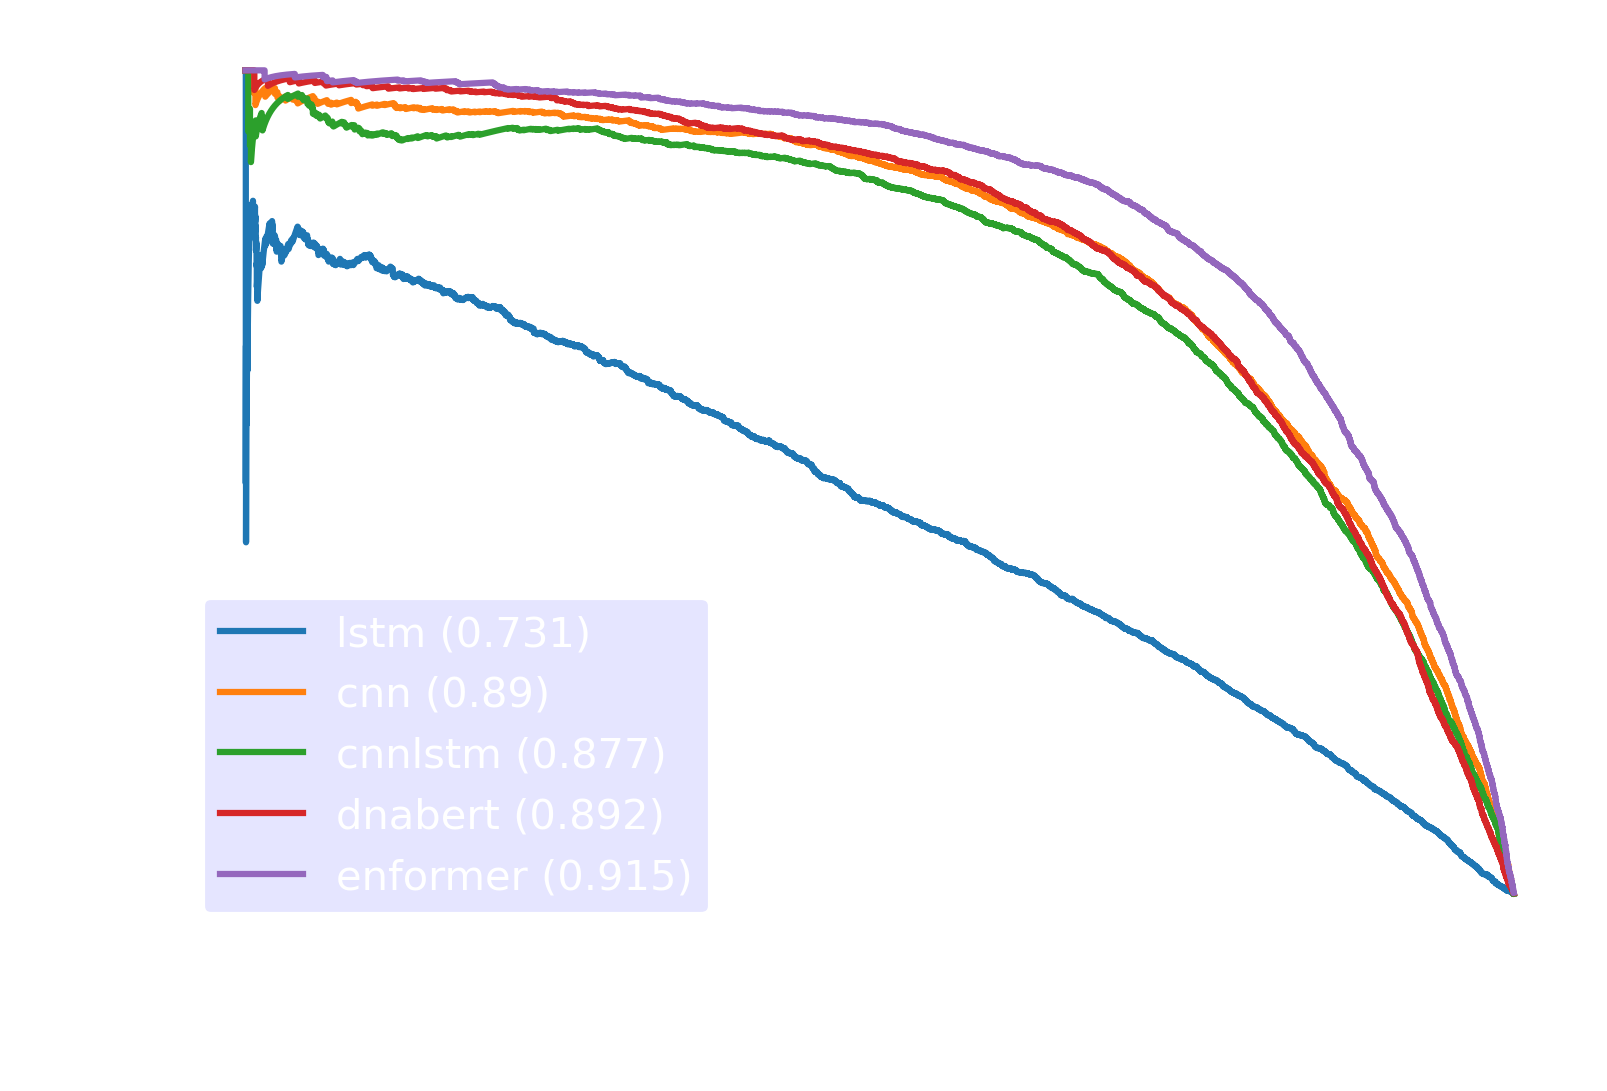

In [71]:
matplotlib.rcParams.update({'text.color' : "white", 'axes.labelcolor' : "white",'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white'})
plt.figure(dpi=300)
# plt.rc_context({})

for p in type_1_paths:
    model_name = p.split('/')[-1].split('_')[1]
    result = torch.load(p)
    plt.plot(result['recall'], result['precision'], label=f"{model_name} ({round(result['auprc'], 3)})")
#     plt.plot(cnn_lstm['recall'], cnn_lstm['precision'], label=f"CNN+LSTM ({round(cnn_lstm['auprc'], 3)})")

#     plt.plot(enformer_scratch['recall'], enformer_scratch['precision'], label=f"Enformer ({round(enformer_scratch['auprc'], 3)})")
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
legend = plt.legend(edgecolor="white")
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 1, 0.1))
plt.savefig('./all_archi_test1.png', transparent=True)
plt.show()

In [45]:
for p in type_1_paths:
    model_name = p.split('/')[-1].split('_')[1]
    result = torch.load(p)
    print(model_name, result['auprc'])

lstm 0.7307252639415962
cnn 0.889882767910123
cnnlstm 0.8768499348329248
dnabert 0.8918142896085787
enformer 0.9153809285485033


In [46]:
for p in type_2_paths:
    model_name = p.split('/')[-1].split('_')[1]
    result = torch.load(p)
    print(model_name, result['auprc'])

enformer 0.9603426941234101
cnn 0.8738651773071284
cnnlstm 0.860011425485155
dnabert 0.9189217785944279
lstm 0.8814018387282592


In [47]:
for p in type_3_paths:
    model_name = p.split('/')[-1].split('_')[1]
    result = torch.load(p)
    print(model_name, result['auprc'])

lstm 0.26214410491954554
enformer 0.8748517299345948
cnn 0.9601503922819952
dnabert 0.8677443052852375
cnnlstm 0.961905620386754


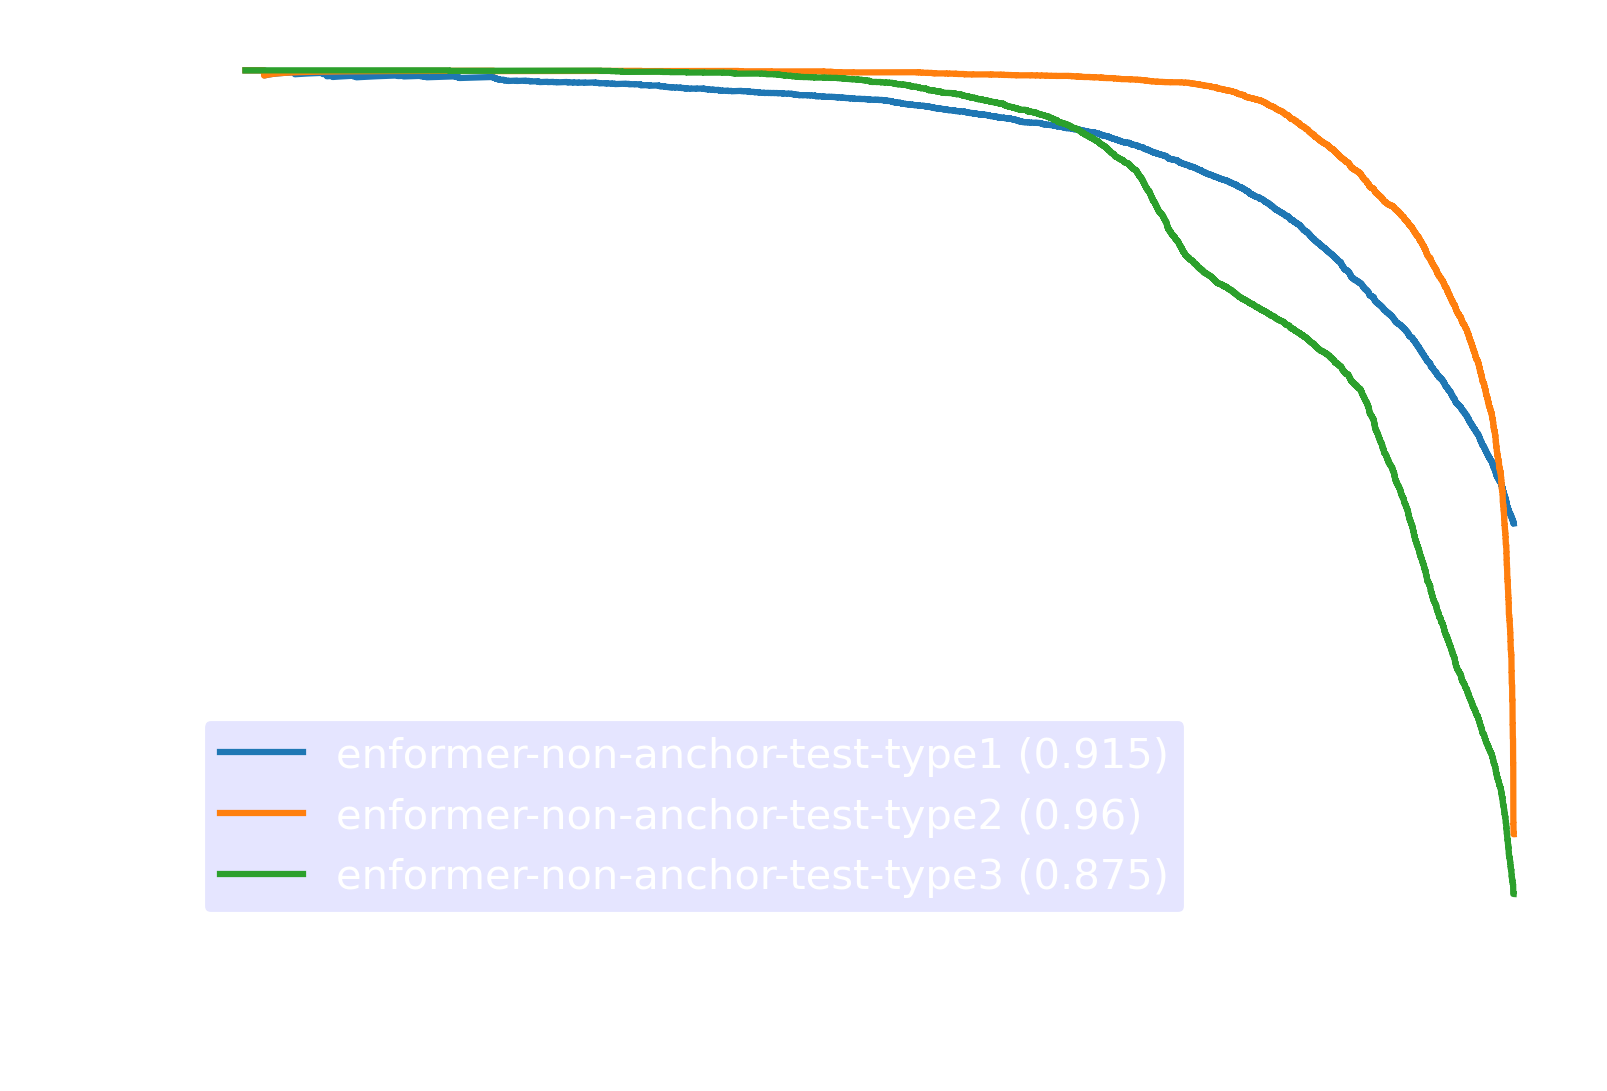

In [73]:
plt.figure(dpi=300)

for p in type_1_paths+type_2_paths+type_3_paths:
    model_name = p.split('/')[-1].split('_')[1]
    if model_name != 'enformer':
        continue
    test_type = p.split('/')[-1].split('_')[-1][0]
    result = torch.load(p)
    plt.plot(result['recall'], result['precision'], label=f"{model_name}-non-anchor-test-type{test_type} ({round(result['auprc'], 3)})")
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
legend = plt.legend(edgecolor="white")
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((0, 0, 1, 0.1))
plt.savefig('./enformer_alltest.png', transparent=True)
plt.show()